In [11]:
import requests
import pandas as pd

api_key = '0fd25ed381ad4d379d699379f1b6f6363de41fee'

url = 'https://api.census.gov/data/2022/acs/acs5'

params = {
    'get': 'NAME,B01003_001E',
    'for': 'county:*',
    'in': 'state:08',  # Colorado
    'key': api_key
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data[1:], columns=data[0])
    print(df.head())

    # Save file to Colab environment
    df.to_csv('colorado_county_population_from_api.csv', index=False)
else:
    print(f"Error: {response.status_code}")


                         NAME B01003_001E state county
0      Adams County, Colorado      520149    08    001
1    Alamosa County, Colorado       16460    08    003
2   Arapahoe County, Colorado      654453    08    005
3  Archuleta County, Colorado       13509    08    007
4       Baca County, Colorado        3496    08    009


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAME         64 non-null     object
 1   B01003_001E  64 non-null     object
 2   state        64 non-null     object
 3   county       64 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [13]:
print(df.columns)


Index(['NAME', 'B01003_001E', 'state', 'county'], dtype='object')


In [14]:
print(df.isnull().sum())


NAME           0
B01003_001E    0
state          0
county         0
dtype: int64


In [15]:
df['B01003_001E'] = pd.to_numeric(df['B01003_001E'])
df.describe()


,B01003_001E
count,64.000000
mean,90168.593750
std,183135.852888
min,690.000000
25%,5732.250000
50%,15073.000000
75%,44394.000000
max,730323.000000


In [16]:
df_sorted = df.sort_values(by='B01003_001E', ascending=False)
print(df_sorted.head(10))


                          NAME  B01003_001E state county
21    El Paso County, Colorado       730323    08    041
16     Denver County, Colorado       710800    08    031
2    Arapahoe County, Colorado       654453    08    005
30  Jefferson County, Colorado       580519    08    059
0       Adams County, Colorado       520149    08    001
18    Douglas County, Colorado       360206    08    035
35    Larimer County, Colorado       359363    08    069
62       Weld County, Colorado       331466    08    123
6     Boulder County, Colorado       328658    08    013
51     Pueblo County, Colorado       168135    08    101


/tmp/ipython-input-17-1351681346.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='B01003_001E', y='NAME', data=top10, palette='Blues_r')


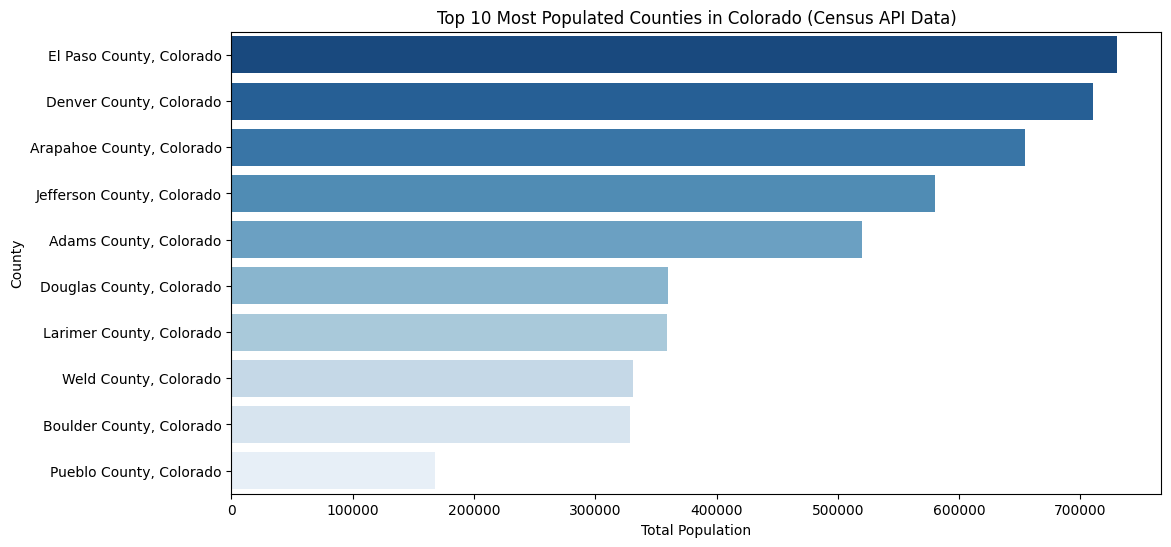

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = df_sorted.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='B01003_001E', y='NAME', data=top10, palette='Blues_r')
plt.xlabel("Total Population")
plt.ylabel("County")
plt.title("Top 10 Most Populated Counties in Colorado (Census API Data)")
plt.show()


Data Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Prepare Your DataFrame for Plotting
df['B01003_001E'] = pd.to_numeric(df['B01003_001E'])
df['county'] = df['NAME'].str.replace(" County, Colorado", "")
df = df.sort_values('B01003_001E', ascending=False)


 Top 10 Most Populated Counties — Bar Plot

/tmp/ipython-input-4-1397278377.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='B01003_001E', y='county', data=df.head(10), palette='Blues_r')


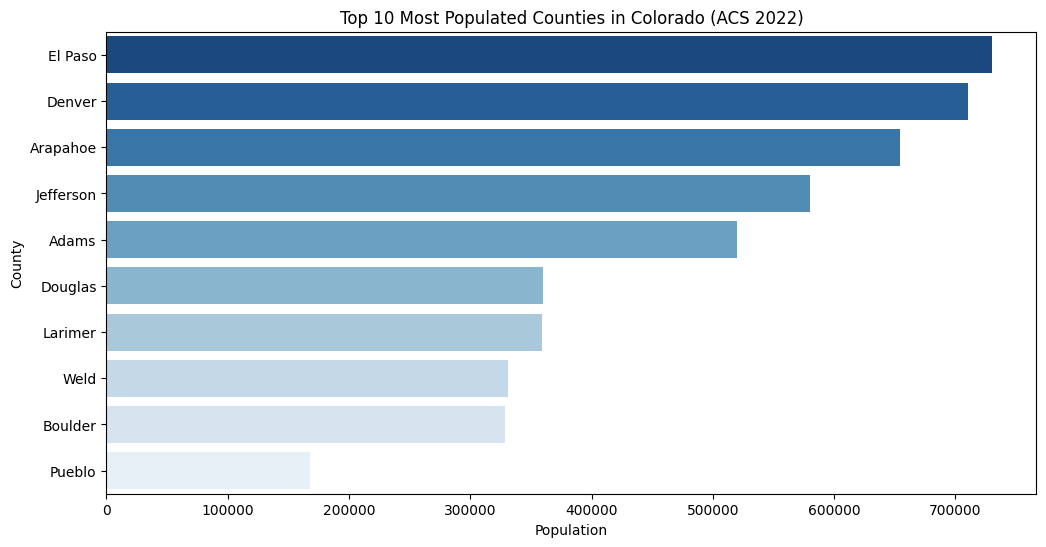

In [4]:
plt.figure(figsize=(12,6))
sns.barplot(x='B01003_001E', y='county', data=df.head(10), palette='Blues_r')
plt.xlabel("Population")
plt.ylabel("County")
plt.title("Top 10 Most Populated Counties in Colorado (ACS 2022)")
plt.show()


Bottom 10 Least Populated Counties — Bar Plot

/tmp/ipython-input-5-2105233440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='B01003_001E', y='county', data=df.tail(10), palette='Oranges_r')


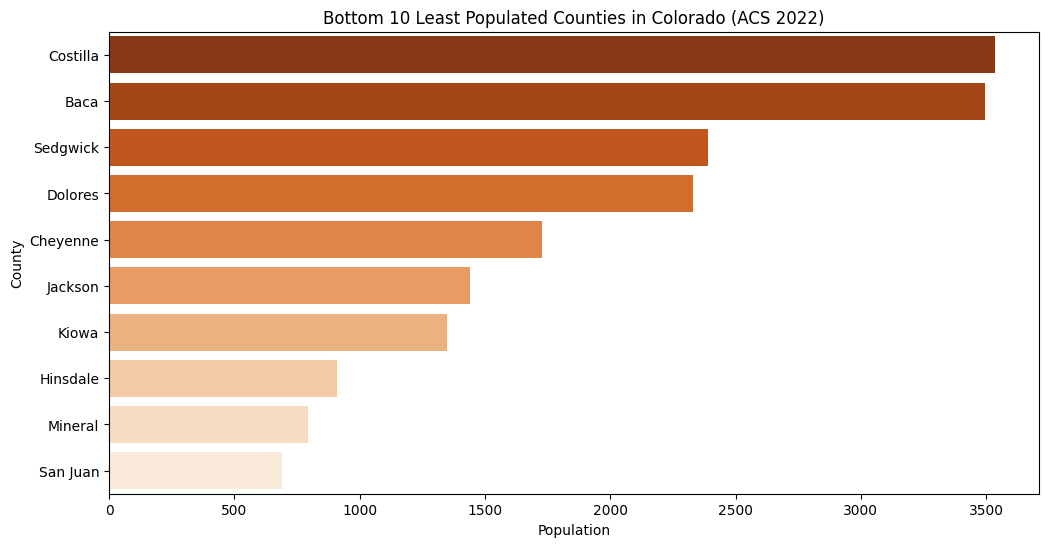

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x='B01003_001E', y='county', data=df.tail(10), palette='Oranges_r')
plt.xlabel("Population")
plt.ylabel("County")
plt.title("Bottom 10 Least Populated Counties in Colorado (ACS 2022)")
plt.show()


Histogram of County Populations

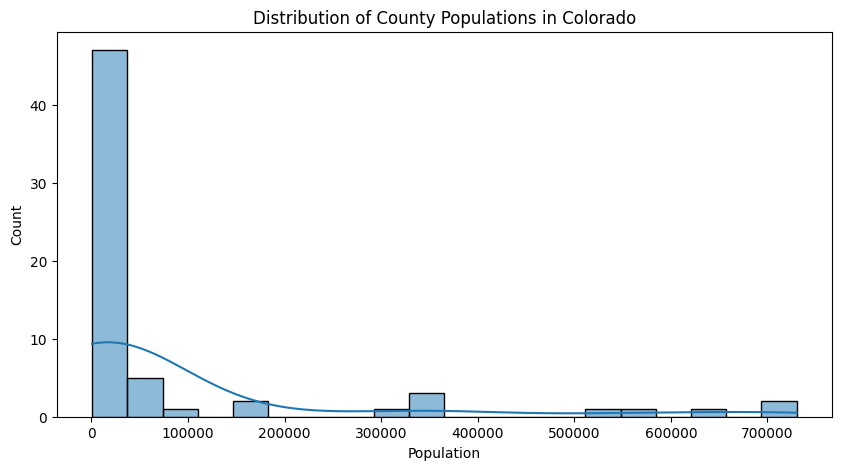

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['B01003_001E'], bins=20, kde=True)
plt.xlabel("Population")
plt.title("Distribution of County Populations in Colorado")
plt.show()


Boxplot to Identify Outliers

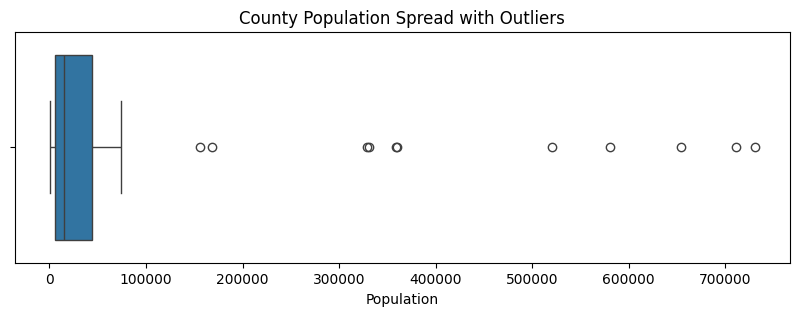

In [7]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['B01003_001E'])
plt.xlabel("Population")
plt.title("County Population Spread with Outliers")
plt.show()


Population Proportion Pie Chart (Top 5 Counties)

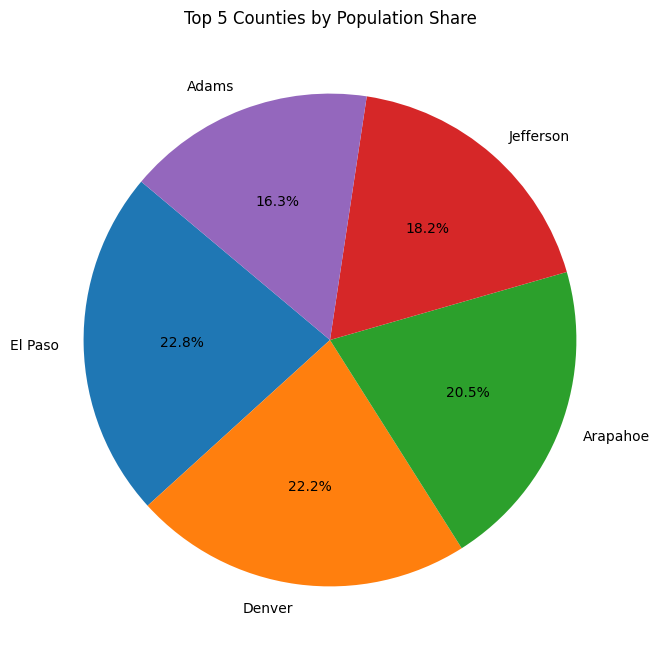

In [8]:
top5 = df.head(5)
plt.figure(figsize=(8,8))
plt.pie(top5['B01003_001E'], labels=top5['county'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Counties by Population Share")
plt.show()


Population Cumulative Line Chart

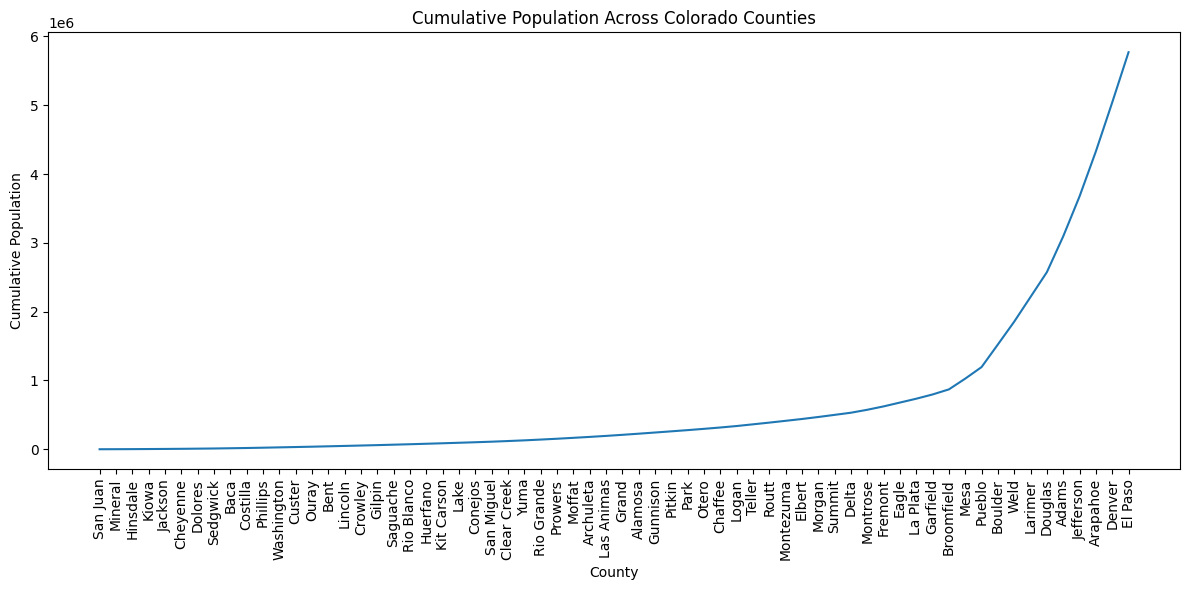

In [9]:
plt.figure(figsize=(12,6))
df_sorted = df.sort_values('B01003_001E')
df_sorted['cumulative'] = df_sorted['B01003_001E'].cumsum()

plt.plot(df_sorted['county'], df_sorted['cumulative'])
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Cumulative Population")
plt.title("Cumulative Population Across Colorado Counties")
plt.tight_layout()
plt.show()
